In [631]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [632]:
#Carga de datos
doble = pd.read_excel("bombillo_rendija_doble.xlsx")
simple = pd.read_excel("bombillo_rendija_simple.xlsx")
doble.columns = doble.columns.str.strip()
simple.columns = simple.columns.str.strip()

In [633]:
# Encuentra el valor de x correspondiente al conteo máximo en 'doble'
x_max_doble = doble.loc[doble['c_prom'].idxmax(), 'x']
x_max_simple = simple.loc[simple['c_prom'].idxmax(), 'x']

# Aplica el desplazamiento a las posiciones
doble['x'] = doble['x'] - x_max_doble
simple['x'] = simple['x'] - x_max_simple

In [634]:
#Versión original
def I_simple(x, A,B,C):
    return A*( (np.sin(B*x+C))/(B*x+C) ) 

def I_doble(x, A,D,C):
    return A*(np.cos(D*x))**2*(np.sin(C*x)/(C*x))**2

In [635]:
#Versión para evitar errores
def I_simple(x, A, B, C):
    z = B * x + C
    sinc = np.where(z == 0, 1, np.sin(z) / z)
    return A * sinc**2

def I_doble(x, A, D, C):
    return A * (np.cos(D * x))**2 * (np.sinc(C * x / np.pi))**2

In [636]:
# Ajuste para datos simples
x_s = simple['x'].values
y_s = simple['c_prom'].values
yerr_s = simple['desv'].values

# Ajuste para simple
popt_s, pcov_s = curve_fit(I_simple, x_s, y_s, sigma=yerr_s, absolute_sigma=True, p0=[110, 1, 0])

# Ajuste para datos dobles
x_d = doble['x'].values
y_d = doble['c_prom'].values
yerr_d = doble['desv'].values

# Ajuste para doble
popt_d, pcov_d = curve_fit(I_doble, x_d, y_d, sigma=yerr_d, absolute_sigma=True, p0=[100, 5, 1])

# Eje x para curvas ajustadas
x_fit_s = np.linspace(x_s.min(), x_s.max(), 1000)
x_fit_d = np.linspace(x_d.min(), x_d.max(), 1000)

#Incertidumbres en los parámetros
perr_s = np.sqrt(np.diag(pcov_s))  # incertidumbre rendija simple
perr_d = np.sqrt(np.diag(pcov_d))  # incertidumbre rendija doble

C:\Users\Juan\AppData\Local\Temp\ipykernel_19600\3579856458.py:4: RuntimeWarning: invalid value encountered in divide
  sinc = np.where(z == 0, 1, np.sin(z) / z)


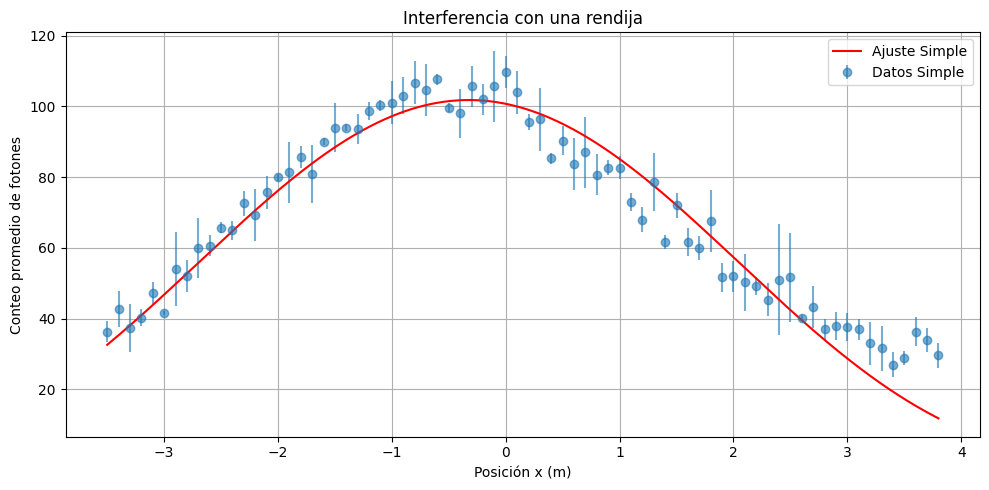

In [637]:
# === Gráfica para el patrón simple ===
plt.figure(figsize=(10, 5))
plt.errorbar(x_s, y_s, yerr=yerr_s, fmt='o', label='Datos Simple', alpha=0.6)
plt.plot(x_fit_s, I_simple(x_fit_s, *popt_s), 'r-', label='Ajuste Simple')
plt.xlabel('Posición x (m)')
plt.ylabel('Conteo promedio de fotones')
plt.title('Interferencia con una rendija')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

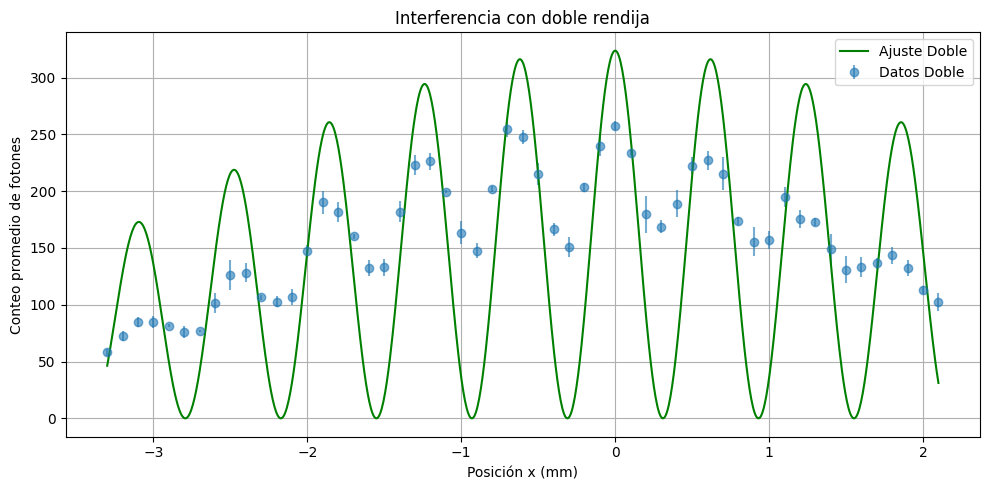

In [638]:
# === Gráfica para el patrón doble ===
plt.figure(figsize=(10, 5))
plt.errorbar(x_d, y_d, yerr=yerr_d, fmt='o', label='Datos Doble', alpha=0.6)
plt.plot(x_fit_d, I_doble(x_fit_d, *popt_d), 'g-', label='Ajuste Doble')
plt.xlabel('Posición x (mm)')
plt.ylabel('Conteo promedio de fotones')
plt.title('Interferencia con doble rendija')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [639]:
# Rendija sencilla
print("Ajuste: Rendija SENCILLA")
print(f"A = {popt_s[0]:.3f} ± {perr_s[0]:.3f} (amplitud)")
print(f"B = {popt_s[1]:.3f} ± {perr_s[1]:.3f}")
print(f"C = {popt_s[2]:.3f} ± {perr_s[2]:.3f} (desfase)")
print()

# Rendija doble
print("Ajuste: Rendija DOBLE")
print(f"A = {popt_d[0]:.3f} ± {perr_d[0]:.3f} (amplitud)")
print(f"D = {popt_d[1]:.3f} ± {perr_d[1]:.3f}")
print(f"C = {popt_d[2]:.3f} ± {perr_d[2]:.3f}")

Ajuste: Rendija SENCILLA
A = 101.798 ± 0.504 (amplitud)
B = 0.548 ± 0.003
C = 0.178 ± 0.006 (desfase)

Ajuste: Rendija DOBLE
A = 323.669 ± 1.636 (amplitud)
D = 5.062 ± 0.001
C = -0.429 ± 0.005


In [640]:
d=0.356e-3
a=0.1e-3

lambda_exp_sencilla = 10**6*np.pi*a/popt_s[1]
inc_lambda_exp_sencilla = 10**6*np.pi*a/popt_s[1]**2 * perr_s[1]

lambda_exp_doble = 10**6*np.pi*d/popt_d[1]
inc_lambda_exp_doble = 10**6*np.pi*d/popt_d[1]**2 * perr_d[1]



In [641]:
# Rendija sencilla
print("VALORES EXPERIMENTALES HALLADOS")
print("Rendija SENCILLA")
print(f"λ = ({lambda_exp_sencilla:.0f} ± {inc_lambda_exp_sencilla:.0f}) nm")
print()

# Rendija doble
print("Rendija DOBLE")
print(f"λ = ({lambda_exp_doble:.1f} ± {inc_lambda_exp_doble:.1f}) nm")

VALORES EXPERIMENTALES HALLADOS
Rendija SENCILLA
λ = (573 ± 3) nm

Rendija DOBLE
λ = (220.9 ± 0.1) nm


In [642]:
#Carga de datos
voltaje_var = pd.read_excel("voltaje_variable.xlsx")
voltaje_var.columns = voltaje_var.columns.str.strip()

intensidad_var = pd.read_excel("intensidad_variable.xlsx")
intensidad_var.columns = intensidad_var.columns.str.strip()

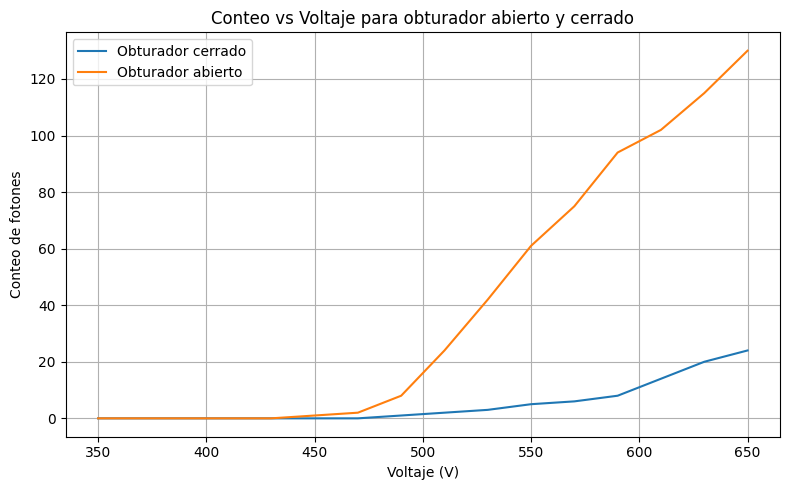

In [643]:
# Graficar
plt.figure(figsize=(8, 5))
plt.plot(voltaje_var["V"], voltaje_var["c_abierto"], label="Obturador cerrado")
plt.plot(voltaje_var["V"], voltaje_var["c_cerrado"], label="Obturador abierto")

# Estética
plt.xlabel("Voltaje (V)")
plt.ylabel("Conteo de fotones")
plt.title("Conteo vs Voltaje para obturador abierto y cerrado")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


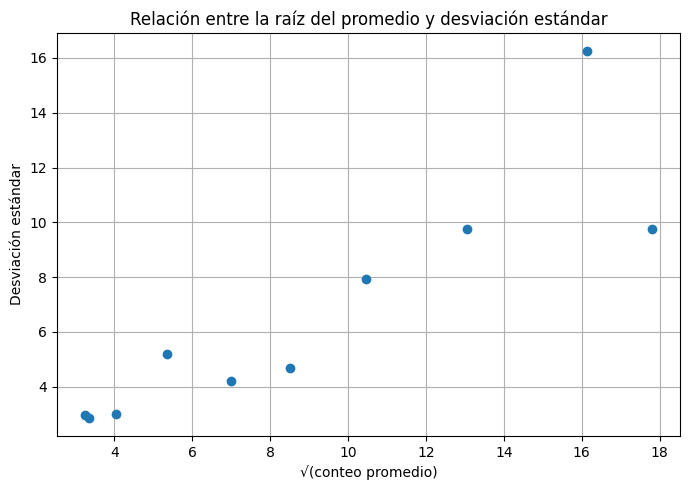

In [644]:
# Calcular raíz del conteo promedio
raiz_cprom = np.sqrt(intensidad_var["c_prom"])

# Graficar
plt.figure(figsize=(7, 5))
plt.plot(raiz_cprom, intensidad_var["desv"], 'o')

# Estética
plt.xlabel("√(conteo promedio)")
plt.ylabel("Desviación estándar")
plt.title("Relación entre la raíz del promedio y desviación estándar")
plt.grid(True)
plt.tight_layout()
plt.show()